In [48]:
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd

In [49]:
school_data = pd.read_csv( './sfusd-calpads-data.csv' ).drop_duplicates()
school_names = pd.read_csv( './sfusd-school-codes.csv' ).drop_duplicates()

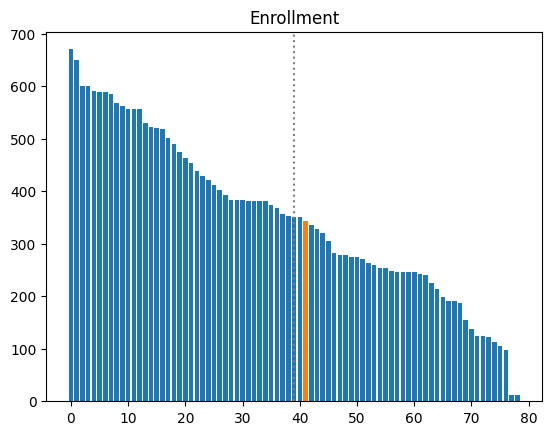

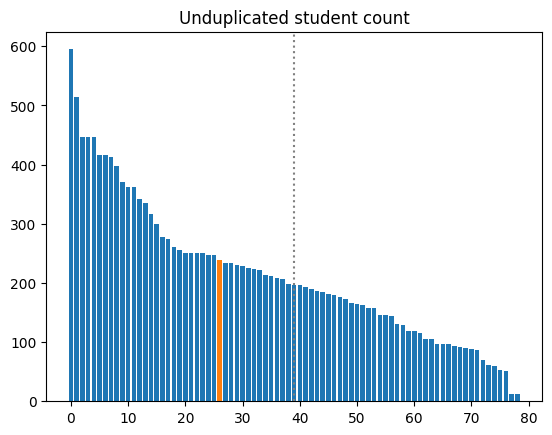

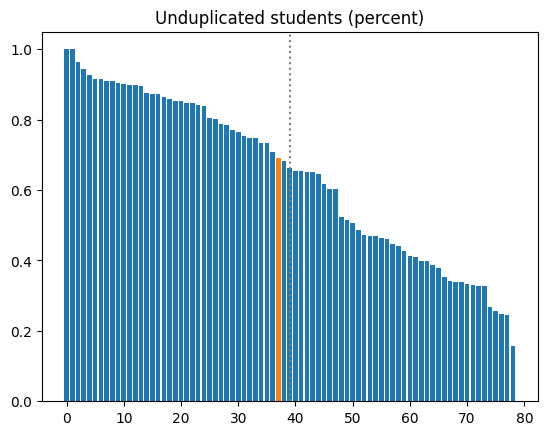

In [51]:
elementary_schools = school_names[lambda _df: _df.grade_low.isin( [ 'K', 'P' ] )]
elementary_data = school_data.merge( elementary_schools, on = 'school_code' )

for school_type in [ 'Elementary Schools (Public)' ]:#, 'Preschool' ]:
    plot_df = elementary_data \
            [lambda _df: _df.school_type == school_type ] \
            [lambda _df: _df.academic_year == '2023-2024'] \
            [['school_code','school_name','academic_year','enrollment','unduplicated_count']] \
            .assign( unduplicated_pct = lambda _df: _df.unduplicated_count / _df.enrollment ) \
            .drop_duplicates() \
            
    plot_df = plot_df.sort_values( 'enrollment', ascending = False ).reset_index( drop = True )
    rpes_mask = plot_df.school_name.str.contains( 'Parks' )
    plot.bar( plot_df.index, plot_df.enrollment )
    plot.bar( plot_df[rpes_mask].index, plot_df[rpes_mask].enrollment )
    plot.title( 'Enrollment' )
    plot.axvline( np.mean( list( plot_df.index ) ), linestyle = 'dotted', color = 'grey' )
    plot.show()

    plot_df = plot_df.sort_values( 'unduplicated_count', ascending = False ).reset_index( drop = True )
    rpes_mask = plot_df.school_name.str.contains( 'Parks' )
    plot.bar( plot_df.index, plot_df.unduplicated_count )
    plot.bar( plot_df[rpes_mask].index, plot_df[rpes_mask].unduplicated_count )
    plot.title( 'Unduplicated student count' )
    plot.axvline( np.mean( list( plot_df.index ) ), linestyle = 'dotted', color = 'grey' )
    plot.show()

    plot_df = plot_df.sort_values( 'unduplicated_pct', ascending = False ).reset_index( drop = True )
    rpes_mask = plot_df.school_name.str.contains( 'Parks' )
    plot.bar( plot_df.index, plot_df.unduplicated_pct )
    plot.bar( plot_df[rpes_mask].index, plot_df[rpes_mask].unduplicated_pct )
    plot.title( 'Unduplicated students (percent)' )
    plot.axvline( np.mean( list( plot_df.index ) ), linestyle = 'dotted', color = 'grey' )
    plot.show()

In [35]:
elementary_data[elementary_data.school_code == 117515]

,school_code,academic_year,enrollment,frpm_count,foster_count,homeless_count,migrant_program_count,direct_certification_count,frpm_eligible_count,english_learned_count,unduplicated_count,source_sheet,foster_tribal_count,school_name,school_type,grade_low,grade_high
827,117515,2018-2019,2,0,0,0,0,0,0,0,0,School-Level CALPADS UPC Data,NaN,Weill (Raphael) Children Center,Preschool,P,P


In [32]:
elementary_schools[lambda _df: _df.school_name.str.contains( 'eill' )]

,school_code,school_name,school_type,grade_low,grade_high
135,117515,Weill (Raphael) Children Center,Preschool,P,P
